<h1>Содержание<span class="tocSkip"></span></h1>

<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span>
    
<ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li>
    
<li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span>
    
<ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li>
    
    
<li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ данных</a></span>
    
<ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li>
    
<li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span>
    
<ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li>
    
<li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование успешности компьютерных игр

В нашем распоряжении данные интернет-магазина «Стримчик» , который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).
Задача - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Доступны данные до 2016 года. Представим, что сейчас декабрь 2016 г., и нужно спланировать кампанию на 2017-й.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Изучение данных из файла

**Описание данных**


- *Name* — название игры


- *Platform* — платформа


- *Year_of_Release* — год выпуска


- *Genre* — жанр игры


- *NA_sales* — продажи в Северной Америке (миллионы проданных копий)


- *EU_sales* — продажи в Европе (миллионы проданных копий)


- *JP_sales* — продажи в Японии (миллионы проданных копий)


- *Other_sales* — продажи в других странах (миллионы проданных копий)


- *Critic_Score* — оценка критиков (максимум 100)


- *User_Score* — оценка пользователей (максимум 10)


- *Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


Данные за 2016 год могут быть неполными.

Импортируем нужные библиотеки и настроим формат вывода:

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from scipy import stats as st
from scipy.stats import levene
import numpy as np
import warnings
warnings.filterwarnings('ignore')

!pip install seaborn --upgrade

#sns.set_theme()

pd.set_option('display.float_format', '{:.2f}'.format)

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.1)


Загрузим датасет и посмотрим на него:

In [76]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
df.info()
print()
print(df.columns)
print()
print(df.head(15))
print()
print('Число дубликатов:', df.duplicated().sum())
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

                           Name Platform  Year_of_Release         Genre  \
0                    Wii Sports      Wii          2006.00        Sports   
1             Super Mario Bros.      NES          1985.0

### Вывод

Проблемы, которые нужно решать: 

- пропуски и некачественные названия столбцов.
- поменять тип данных в столбцах Year_of_Release и Critic_Score

Пропуски в Year_of_Release, Critic_Score, User_Score и Rating могут быть связаны с техническими проблемами, о которых стоит сообщить в разработку. Возможно, данные по рейтингу были собраны из разных источников и склеены в итоге. 

В данном исследовании мы удалим пропуски в Year_of_Release. Их немного, меньше 2%, так что на результат не должны сильно повлиять. Ниже посмотрим подробнее на 2 пропуска в колонках name и genre.

## Подготовка данных

Заменим названия столбцов:

In [77]:
df = df.rename(columns=lambda x: x.lower())
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


Посмотрим на 2 пропуска в колонках name и genre

In [78]:
display(df[df['name'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,nan,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,nan,NaN,NaN


Из этих строк мало что можно извлечь, удалим их. Возможная причина - некачественная выгрузка данных. Возможно, это даже одна и та же игра.

In [79]:
df.dropna(subset=['name', 'year_of_release'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


С остальными пропусками ничего поделать не можем, кроме как попытаться проверить, а не существует ли всё-таки по ним данных (запросить у источника данных ещё раз их выгрузить). 

Поменяем тип данных в столбцах year_of_release на int.

In [80]:
df['year_of_release'] = df['year_of_release'].astype(int)

df.info()
df.tail(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,nan,NaN,NaN
16701,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007,Role-Playing,0.00,0.00,0.01,0.00,nan,NaN,NaN
16702,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,60.00,7.2,E10+
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,nan,NaN,NaN
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,nan,tbd,E
16705,15 Days,PC,2009,Adventure,0.00,0.01,0.00,0.00,63.00,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003,Shooter,0.01,0.00,0.00,0.00,nan,tbd,T
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,nan,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,nan,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,nan,NaN,NaN


'tbd' означает To Be Determined (будет определено) или To Be Decided (будет решено). 
Используется, если какая-то информация еще не определена или решение по вопросу не принято. 
Акроним служит для отметки неясностей или пропусков, которые надо заполнить. Считаем их за NaN.
Преобразуем все значения NaN в tbd2:

In [81]:
df = df.fillna('tbd2')

df.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,tbd2,tbd2,tbd2
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,tbd2,tbd2,tbd2
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,tbd2,tbd2,tbd2
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,tbd2,tbd2,tbd2


Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [82]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,tbd2,tbd2,tbd2,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,tbd2,tbd2,tbd2,31.38


### Вывод

Заменили названия столбцов, преобразовав их к нижнему регистру.

Удалили 2 пропуска в колонках name и genre и пропуска в year_of_release.


Заменили тип данных в year_of_release.

'tbd' означает To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить. Привели все пропуски в рейтинге к 'tbd'. Причиной пропусков в рейтинге может быть присоединение отдельного файла по рейтингу, либо таких файлов было несколько (так могли появиться и NaN'ы, и 'tbd')

Стоит ещё поменять тип в user score и critic score. Я это сделаю позже, когда отфильтрую tbd при рассмотрении диаграммы рассеяния и коэффициента корреляции, так как поменять тип столбца на этом этапе, при наличии tbd, не получилось :(

## Анализ данных

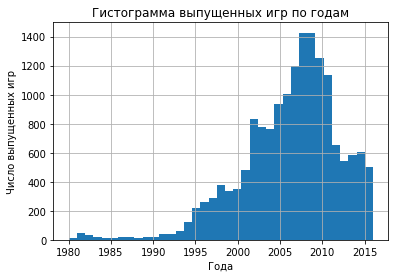

In [83]:
df['year_of_release'].hist(bins=37).set_title('Гистограмма выпущенных игр по годам')
plt.xlabel('Года')
plt.ylabel('Число выпущенных игр')
plt.show()

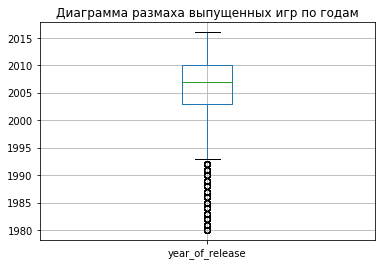

In [84]:
df.boxplot(column='year_of_release').set_title('Диаграмма размаха выпущенных игр по годам')
plt.show()

До 1995 года почти не было выпусков, а с 2002го произошёл резкий скачок. Пик - 2007-2011, затем идёт резкое снижение почти до уровня 2001го года и продолжается вплоть до 2016го. ***Таким образом, актуальный период - 2012-2016гг***. Посмотрим, какие платформы больше всего продавали. Составим таблицу с числом продаж и суммой. Отсортируем по сумме, так как цены на игры, вероятно, росли со временем, и это более значимый показатель, чем количество проданных игр. Посмотрим на продажи и на число проданных игр:

In [85]:
df_platforms = df.pivot_table(index='platform',  
                     values='total_sales', 
                     aggfunc=['count', 'sum']).reset_index().sort_values(by=('sum', 'total_sales'),ascending=False)

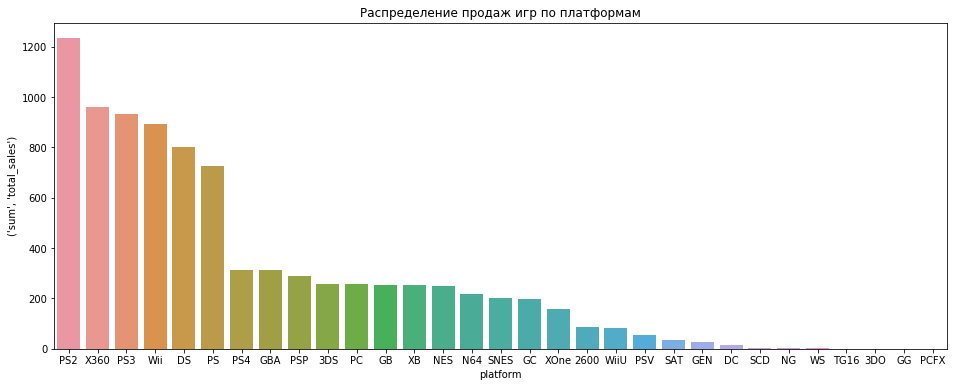

In [86]:
plt.figure(figsize=(16, 6)) 
platform_barplot = sns.barplot(x='platform', y=('sum', 'total_sales'), ci=None, data=df_platforms).set_title('Распределение продаж игр по платформам')
plt.show()

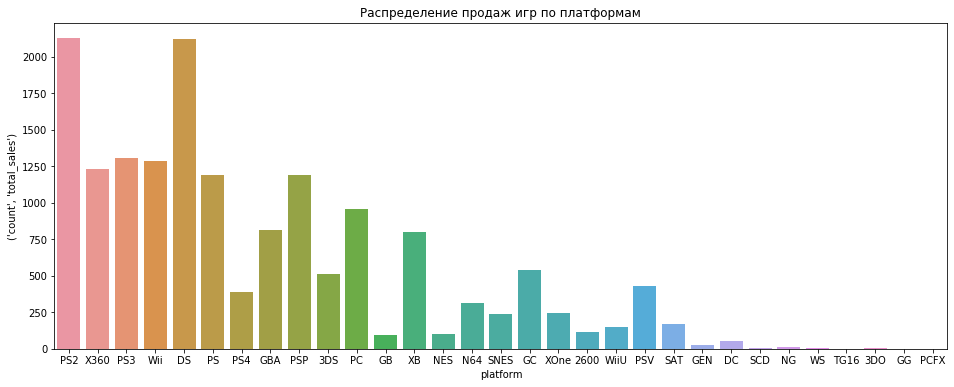

In [87]:
plt.figure(figsize=(16, 6)) 
platform_barplot = sns.barplot(x='platform', y=('count', 'total_sales'), ci=None, data=df_platforms).set_title('Распределение продаж игр по платформам')
plt.show()

Выберем платформы, на которых больше всего продаж. Очевидные лидеры - PS2, X360, PS3, Wii, DS и PS. По данным с числа продаж выделяются ещё PSP, PC, GBA, XB, GC, 3DS, PSV и PS4. Предполагаю, эти платформы имели успех раньше, а потом перестали быть популярными. Проверим, в какие годы у этих платформ основное число продаж:

In [88]:
df_platforms_years = df[df['year_of_release'] >= 2000].pivot_table(index='platform', columns='year_of_release',  
                     values='total_sales', 
                     aggfunc=['sum']).fillna(0)

df_platforms_years.columns = df_platforms_years.columns.get_level_values(1)

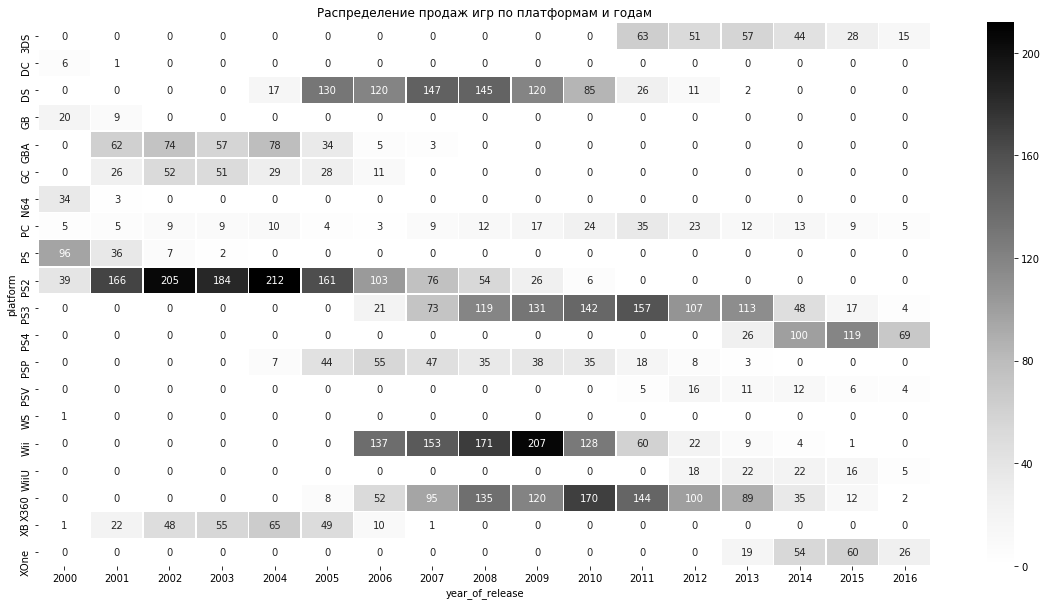

In [89]:
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df_platforms_years, annot=True, cmap='Greys', fmt='.0f', linewidths=.5, ax=ax).set_title('Распределение продаж игр по платформам и годам')
plt.show()

На тепловой карте наглядно показывается жизнь платформ. В один период, например, в каждое десятилетие их было совсем не много, и почти каждая из них живёт 5-10 лет.

Нам стоит взять те платформы, что актуальны сейчас (в 2016 году). Это PS4, XOne, 3DS, PC, PSV и WiiU.

Похоже, что 3DS пришла на смену DS, PSV на смену PSP, WiiU на смену Wii, XOne на смену X360, а PS4 на смену PS3.

Рассматриваемый период: 2012-2016.

Отфильтруем данные по этим признакам.

In [90]:
df_filtered = df.query('year_of_release >= 2012')
#platforms = ['X360', 'PS3', 'Wii', 'XOne', 'PS4', 'WiiU', '3DS', 'PSV', 'PC']

df_filtered = df_filtered.query('platform == "XOne" or platform == "PS4" or platform == "WiiU" or platform == "3DS" or platform == "PSV" or platform == "PC"')
display(df_filtered.head())
print('Всего строк:', (len(df_filtered)))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,tbd2,tbd2,tbd2,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,tbd2,tbd2,tbd2,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,tbd2,tbd2,tbd2,11.68
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.00,7.2,E,9.90


Всего строк: 1843


Посмотрим, сколько строк без рейтинга осталось

In [91]:
print('Всего строк без рейтинга:', len(df_filtered.query('critic_score == "tbd" or user_score == "tbd" or rating == "tbd" or critic_score == "tbd2" or user_score == "tbd2" or rating == "tbd2"')))

Всего строк без рейтинга: 976


Много, примерно половина. По-прежнему не будем их заполнять. Посмотрим на тепловую карту для актуального периода и отобранных платформ.

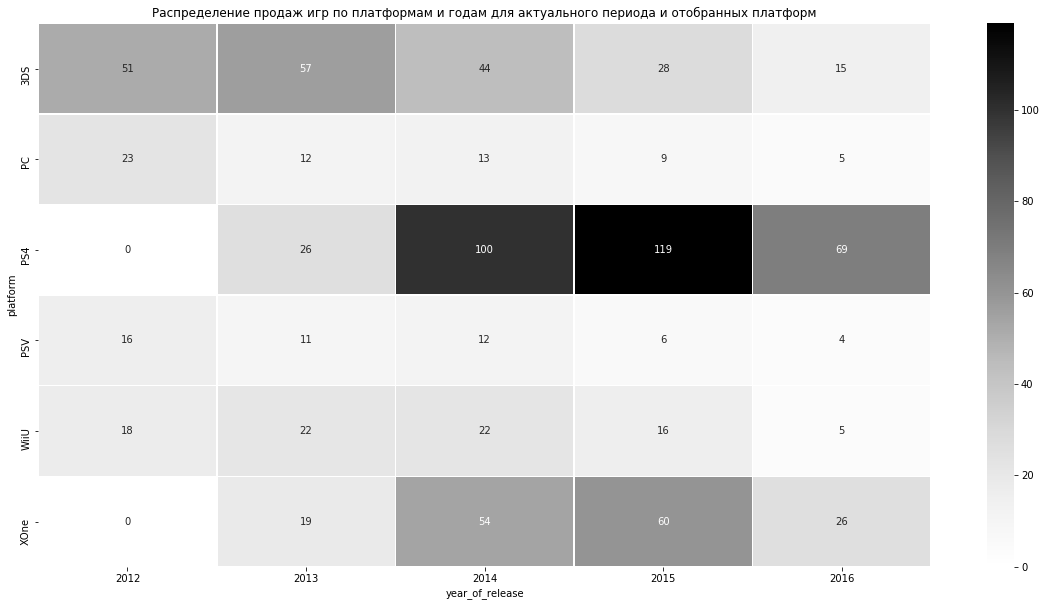

In [92]:
df_platforms_years_filtered = df_filtered.pivot_table(index='platform', columns='year_of_release',  
                     values='total_sales', 
                     aggfunc=['sum']).fillna(0)

df_platforms_years_filtered.columns = df_platforms_years_filtered.columns.get_level_values(1)

f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df_platforms_years_filtered, annot=True, cmap='Greys', fmt='.0f', linewidths=.5, ax=ax).set_title('Распределение продаж игр по платформам и годам для актуального периода и отобранных платформ')
plt.show()

В 2015 году в топе были PS4 и XOne. Также видно, что продажи этих платформ в 2015 году выросли по сравнению с 2014. Ближайшие их конкуренты - 3DS и WiiU, но у них продажи падают, и они не так высоки в сравнении с топовыми PS4 и XOne.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Сделаем 2 варианта: для 2005-2015 гг и для 2016

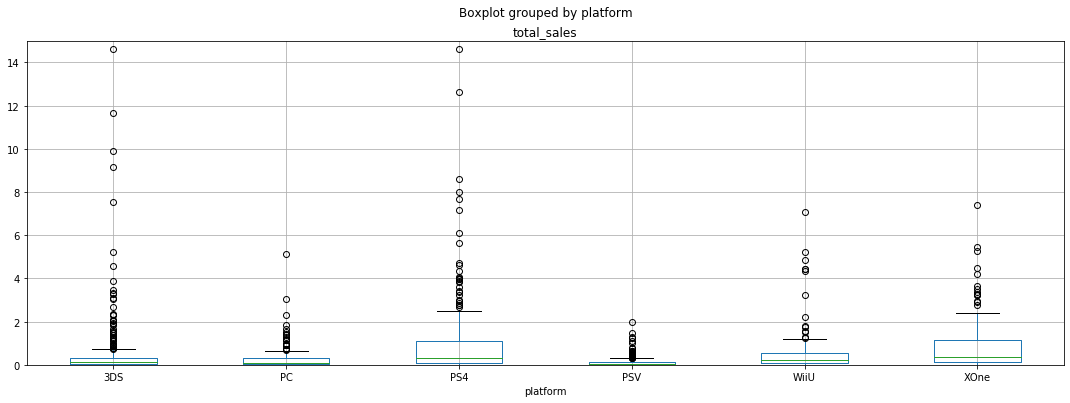

In [93]:
df_filtered[(df_filtered['year_of_release'] >= 2012) & (df_filtered['year_of_release'] <= 2015)].boxplot(column='total_sales', by='platform', figsize=(18,6))
plt.ylim(0, 15)
plt.show()

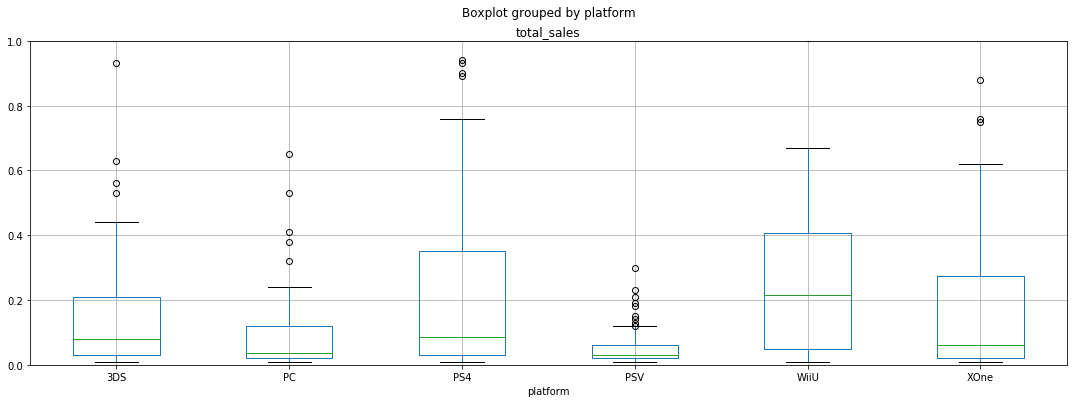

In [94]:
df_filtered[(df_filtered['year_of_release'] == 2016)].boxplot(column='total_sales', by='platform', figsize=(18,6))
plt.ylim(0, 1)
plt.show()

Заметно, что для PS4 и XOne большой размах по продажам. А медианные значения у топовых платформ в 2005-2016 не сильно отличались. В 2016 WiiU вырвалась вперед по медиане.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграммы рассеяния и посчитаем корреляцию между отзывами пользователей и критиков и продажами для платформы PS4.

In [95]:
display(df_filtered[df_filtered['total_sales'] > 6].sort_values(by='total_sales', ascending=False).head(20))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,tbd2,tbd2,tbd2,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,tbd2,tbd2,tbd2,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,tbd2,tbd2,tbd2,11.68
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.00,7.2,E,9.90
73,Animal Crossing: New Leaf,3DS,2012,Simulation,2.03,2.36,4.39,0.39,88.00,8.7,E,9.17
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.00,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,tbd2,tbd2,tbd2,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.00,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.00,5,E,7.60


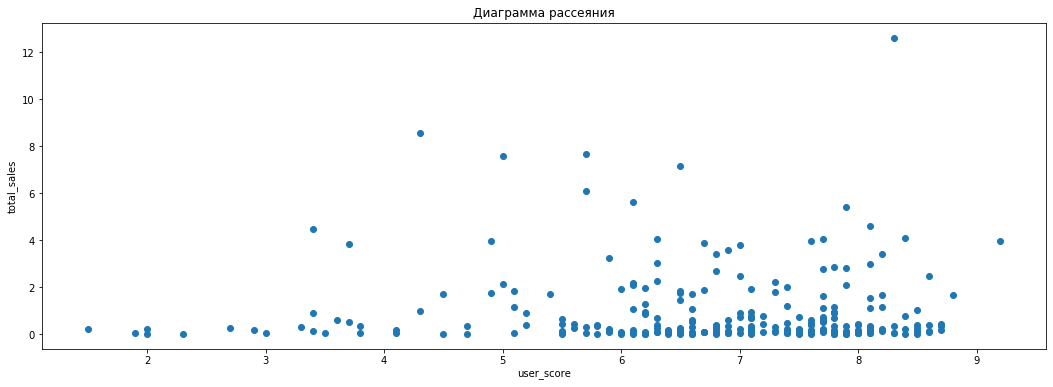

Коэффициент корреляции: -0.03


In [98]:
def scatter_and_corr(parameter_1, parameter_2, platform):
    
    # Функция строит диаграмму рассеяния и считает коэффициент корреляции двух параметров
    
    # Фильртуем таблицу, оставляя нужную платформу и удаляя 'tbd'
    df_short = df_filtered[(df_filtered['platform'] == platform) & (df_filtered[parameter_1] != 'tbd') & (df_filtered[parameter_1] != 'tbd2')]
    # Меняем тип дпнных
    df_short[parameter_1] = df_short[parameter_1].astype(float)
    
    fig, ax = plt.subplots(figsize=(18, 6))
    ax.scatter(x = df_short[parameter_1], y = df_short[parameter_2])
    plt.xlabel(parameter_1)
    plt.ylabel(parameter_2)
    plt.title('Диаграмма рассеяния')
    plt.show()
    
    print('Коэффициент корреляции: {:.2f}'.format(df_short[parameter_1].corr(df_short[parameter_2])))
    
scatter_and_corr('user_score', 'total_sales', 'PS4')

Корреляция почти нулевая. 
Больше всего продаж (и больших продаж) сконцентрировано выше оценки 5.5, однако, сильной зависимости от оценки нет.

Посмотрим, как влияет мнение критиков:

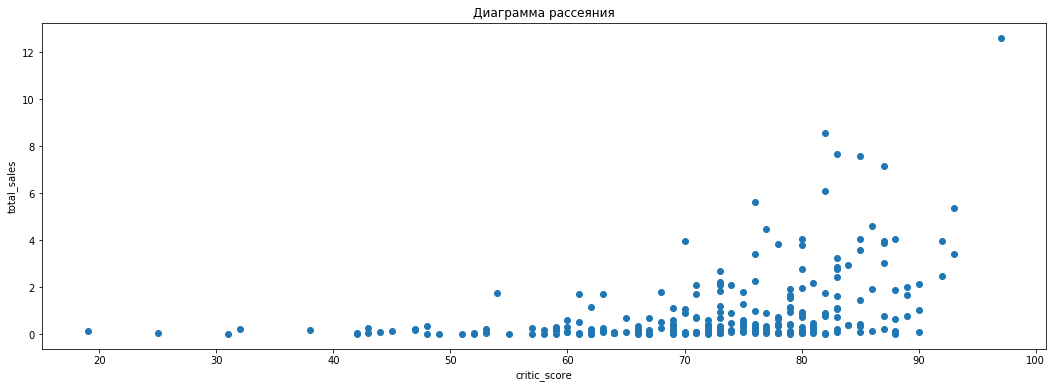

Коэффициент корреляции: 0.41


In [99]:
scatter_and_corr('critic_score', 'total_sales', 'PS4')

Здесь связь наглядна и сильна. Большие продажи появляются, когда рейтинг становится выше 60, и становятся всё больше по мере роста рейтинга.

Посмотрим ту же зависимость продаж от рейтингов для всех платформ.

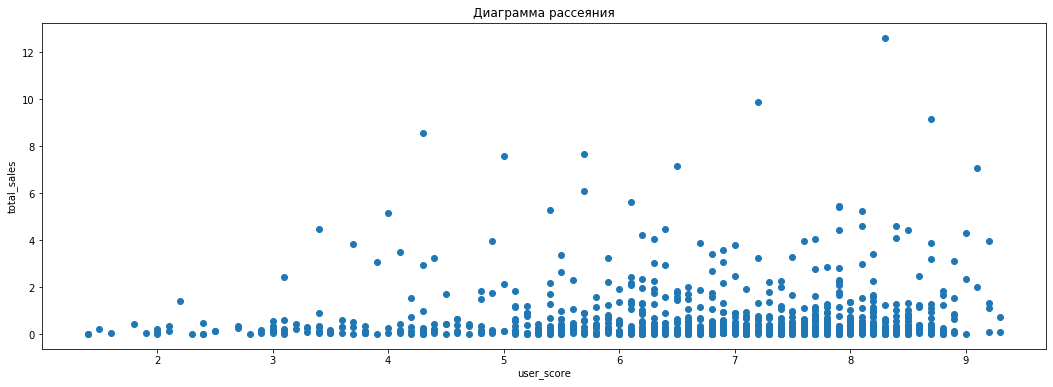

Коэффициент корреляции: 0.02


In [105]:
def scatter_and_corr_all(parameter_1, parameter_2):    
    
    # Функция строит диаграмму рассеяния и считает коэффициент корреляции двух параметров для всех платформ
    df_short = df_filtered[(df_filtered[parameter_1] != 'tbd') & (df_filtered[parameter_1] != 'tbd2')]
    # Меняем тип дпнных
    df_short[parameter_1] = df_short[parameter_1].astype(float)
    
    fig, ax = plt.subplots(figsize=(18, 6))
    ax.scatter(x = df_short[parameter_1], y = df_short[parameter_2])
    plt.xlabel(parameter_1)
    plt.ylabel(parameter_2)
    plt.title('Диаграмма рассеяния')
    plt.show()
    
    print('Коэффициент корреляции: {:.2f}'.format(df_short[parameter_1].corr(df_short[parameter_2])))

scatter_and_corr_all('user_score', 'total_sales')

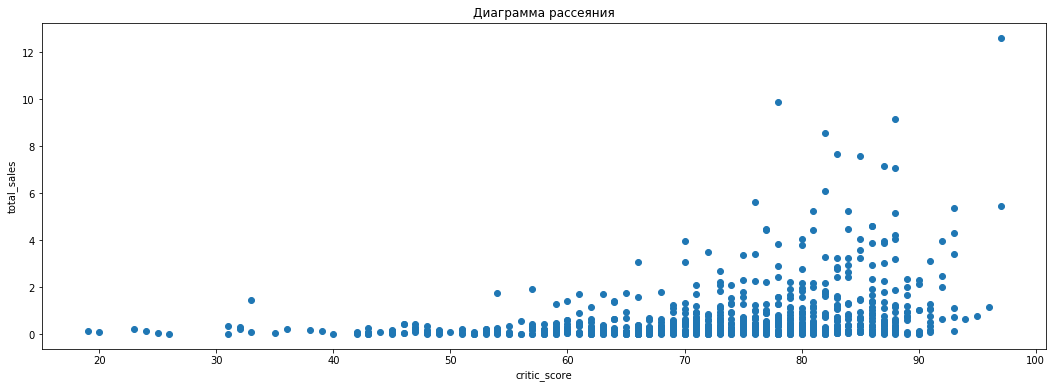

Коэффициент корреляции: 0.31


In [106]:
scatter_and_corr_all('critic_score', 'total_sales')

Получили, что корреляция с рейтингом пользователей почти нулевая, а корреляция с рейтингом критиков уменьшилась. 
Пользователи популярной платформы PS4 больше внимания обращают на рейтинг критиков.

Посмотрим на общее распределение игр по жанрам:
- Что можно сказать о самых прибыльных жанрах? 
- Выделяются ли жанры с высокими и низкими продажами?

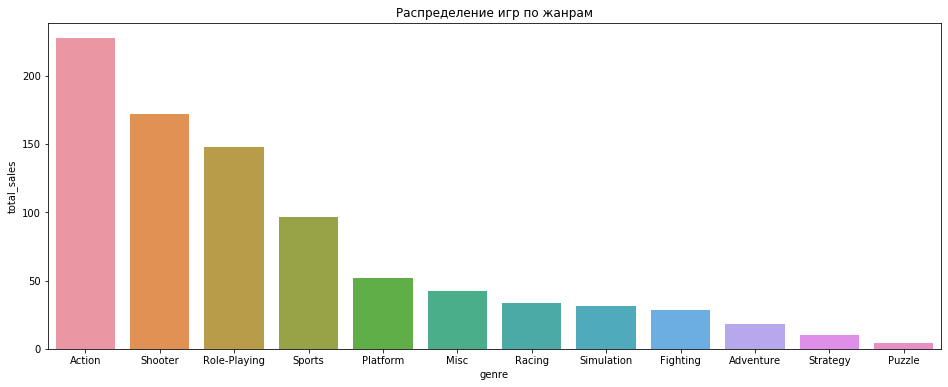

In [107]:
df_filtered_genres = df_filtered.pivot_table(index='genre', values='total_sales', aggfunc='sum').reset_index().sort_values(by='total_sales',ascending=False)

plt.figure(figsize=(16, 6)) 
platform_barplot = sns.barplot(x='genre', y='total_sales', ci=None, data=df_filtered_genres).set_title('Распределение игр по жанрам')
plt.show()

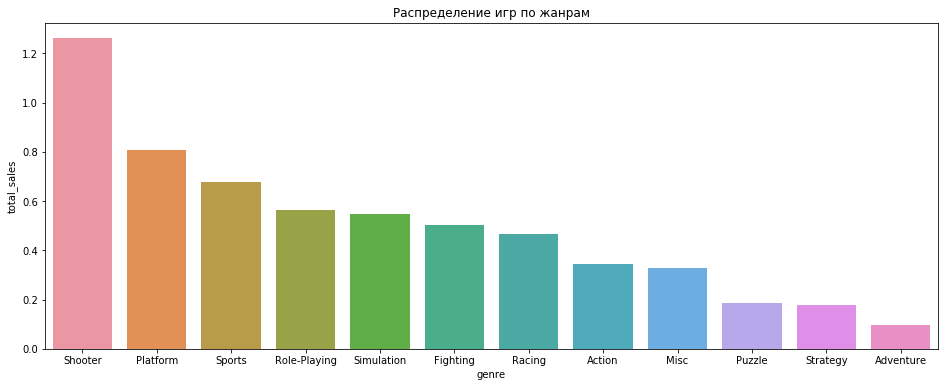

In [111]:
df_filtered_genres_mean = df_filtered.pivot_table(index='genre', values='total_sales', aggfunc='mean').reset_index().sort_values(by='total_sales',ascending=False)

plt.figure(figsize=(16, 6)) 
platform_barplot = sns.barplot(x='genre', y='total_sales', ci=None, data=df_filtered_genres_mean).set_title('Распределение игр по жанрам')
plt.show()

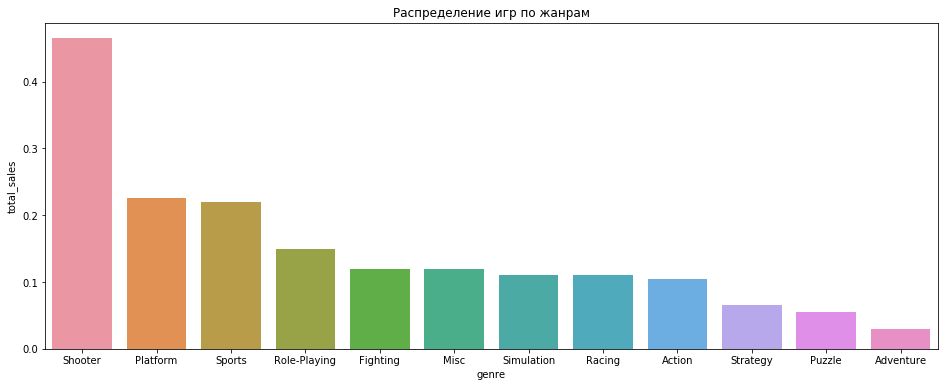

In [112]:
df_filtered_genres_mean = df_filtered.pivot_table(index='genre', values='total_sales', aggfunc='median').reset_index().sort_values(by='total_sales',ascending=False)

plt.figure(figsize=(16, 6)) 
platform_barplot = sns.barplot(x='genre', y='total_sales', ci=None, data=df_filtered_genres_mean).set_title('Распределение игр по жанрам')
plt.show()

Наиболее популярны игры жанра Action, следом идут Shooter и Sports с примерно равной суммой продаж. Наименее популярны Puzzle, Strategy и Adventure. Можно популярные жанры отнести к категории "игр на реакцию", а непопулярные - к "играм на подумать". 

Интересно посмотреть, а как дела у стабильно присутствующего на рынке PC:

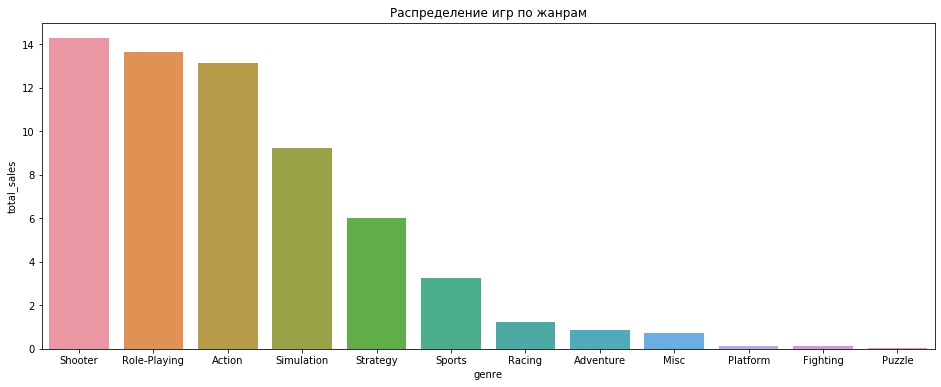

In [115]:
df_filtered_genres = df_filtered[df_filtered['platform'] == 'PC'].pivot_table(index='genre', values='total_sales', aggfunc='sum').reset_index().sort_values(by='total_sales',ascending=False)

plt.figure(figsize=(16, 6)) 
platform_barplot = sns.barplot(x='genre', y='total_sales', ci=None, data=df_filtered_genres).set_title('Распределение игр по жанрам')
plt.show()

Распределение прилично поменялось. Ролевые игры вышли на второе место (наверняка в них удобнее играть с компа, всё же). 

И стратегии и симуляции перестали быть непопулярными. То есть, в целом они не приносят так много денег, как экшн, но своя аудитория у них стабильно есть.

Посмотрим, может быть, у пользователей разных платформ разные предпочтения по жанрам:

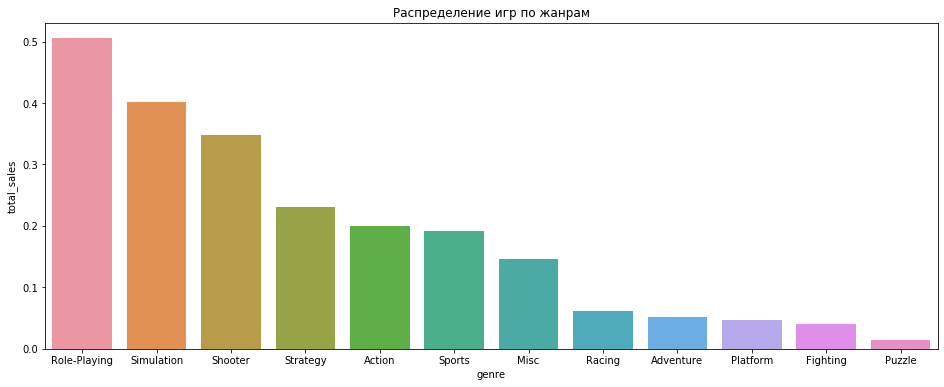

In [114]:
df_filtered_genres = df_filtered[df_filtered['platform'] == 'PC'].pivot_table(index='genre', values='total_sales', aggfunc='mean').reset_index().sort_values(by='total_sales',ascending=False)

plt.figure(figsize=(16, 6)) 
platform_barplot = sns.barplot(x='genre', y='total_sales', ci=None, data=df_filtered_genres).set_title('Распределение игр по жанрам')
plt.show()

<div class="alert alert-block alert-info"> 
    
Теперь уже лидируют ролевые игры и симуляции.
</div>

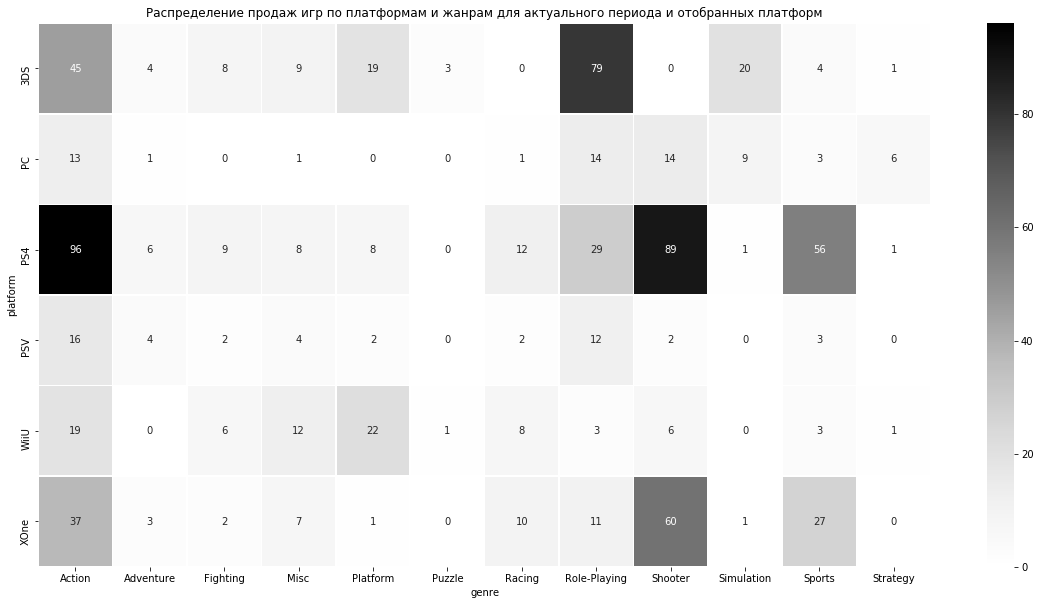

In [117]:
df_platforms_genres = df_filtered.pivot_table(index='platform', columns='genre',  
                     values='total_sales', 
                     aggfunc=['sum']).fillna(0)

df_platforms_genres.columns = df_platforms_genres.columns.get_level_values(1)

f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df_platforms_genres, annot=True, cmap='Greys', fmt='.0f', linewidths=.5, ax=ax).set_title('Распределение продаж игр по платформам и жанрам для актуального периода и отобранных платформ')
plt.show()

Заметно, что какие-то жанры больше покупают на определенных платформах. Так, Misc и Platform лучше всего продаются на платформе WiiU. А для Role-Playing кроме PC отлично продается на 3DS. 

***Портрет пользователя каждого региона***

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5).
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Выделим продажи по каждому региону в список regions и интересующие нас параметры в список parameters. Создадим функцию, выводящую таблицу топ-5 для заданного параметра и региона. Применим ее к параметрам и к регионам.

In [130]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
parameters = ['platform', 'genre', 'rating']
titles = ['Статистика по Северной Америке', 'Статистика по ЕС', 'Статистика по Японии']

def every_region_pop_parameters(parameter, region):
    # Выводит таблицу топ-5 для заданного параметра и региона для таблицы df_filtered
    
    df_filtered_region = df_filtered.pivot_table(index=parameter, values=[region,'total_sales'], aggfunc='sum').sort_values(by=region, ascending = False)
    df_filtered_region['rate'] = df_filtered_region[region] / df_filtered_region['total_sales']
    display(df_filtered_region.head())
    
for parameter in parameters:
    for i in range(len(regions)):
        print(titles[i])
        every_region_pop_parameters(parameter, regions[i])
    print('-----------------------------------------')

Статистика по Северной Америке


,na_sales,total_sales,rate
platform,,,
PS4,108.74,314.14,0.35
XOne,93.12,159.32,0.58
3DS,55.31,194.61,0.28
WiiU,38.10,82.19,0.46
PC,19.12,62.65,0.31


Статистика по ЕС


,eu_sales,total_sales,rate
platform,,,
PS4,141.09,314.14,0.45
XOne,51.59,159.32,0.32
3DS,42.64,194.61,0.22
PC,37.76,62.65,0.60
WiiU,25.13,82.19,0.31


Статистика по Японии


,jp_sales,total_sales,rate
platform,,,
3DS,87.79,194.61,0.45
PSV,21.04,49.18,0.43
PS4,15.96,314.14,0.05
WiiU,13.01,82.19,0.16
XOne,0.34,159.32,0.00


-----------------------------------------
Статистика по Северной Америке


,na_sales,total_sales,rate
genre,,,
Action,85.40,227.44,0.38
Shooter,77.76,171.64,0.45
Role-Playing,46.92,147.43,0.32
Sports,38.71,96.21,0.40
Platform,20.82,51.66,0.40


Статистика по ЕС


,eu_sales,total_sales,rate
genre,,,
Action,83.00,227.44,0.36
Shooter,67.62,171.64,0.39
Sports,41.10,96.21,0.43
Role-Playing,38.48,147.43,0.26
Platform,17.81,51.66,0.34


Статистика по Японии


,jp_sales,total_sales,rate
genre,,,
Role-Playing,51.06,147.43,0.35
Action,34.26,227.44,0.15
Misc,10.53,42.58,0.25
Simulation,9.61,31.32,0.31
Platform,8.55,51.66,0.17


-----------------------------------------
Статистика по Северной Америке


,na_sales,total_sales,rate
rating,,,
M,106.53,251.07,0.42
tbd2,73.03,243.18,0.30
E,65.82,177.27,0.37
E10+,40.02,87.21,0.46
T,39.97,103.36,0.39


Статистика по ЕС


,eu_sales,total_sales,rate
rating,,,
M,103.98,251.07,0.41
E,69.92,177.27,0.39
tbd2,68.71,243.18,0.28
T,36.35,103.36,0.35
E10+,30.61,87.21,0.35


Статистика по Японии


,jp_sales,total_sales,rate
rating,,,
tbd2,82.00,243.18,0.34
E,23.99,177.27,0.14
T,15.37,103.36,0.15
M,9.15,251.07,0.04
E10+,7.63,87.21,0.09


-----------------------------------------


В Северной Америке и Европе популярнее платформа PS4. На втором месте ХOne. И с небольшим отрывом на третьем - 3DS.

Примечательно, что 61% играющих на PC сосредоточены в Европе. И хотя PC в общем обзоре выглядел не так ярко на фоне других платформ, по Европе он входит в ТОП-5. 

А в Японии X box совсем не попал в ТОП-5, зато на первом месте платформа 3DS, 45% продаж с которой приходятся на Японию.

По жанрам распределения Северной Америки и Европы схожи, разве что в Америке Role-Playing на 5 месте, а в Европе Racing. Значительная доля (около половины) всех продаж каждого из жанров из ТОП-5 по Северной Америке приходится на Северную Америку. В Японии лидирует Role-Playing и совсем не входит популярный повсюду Shooter. 

В Северной Америке и Европе наиболее популярны игры для взрослых, на втором месте с небольшим отрывом игры для всех. На третьем месте в Северной Америке игры для детей от 10 лет, на четвертом - для тинейджеров и хуже всего продаются игры для детей младшего возраста. Для Японии на первом месте игры для всех, на втором для тинейджеров, на третьем - для взрослых, и на последнем - для детей младшего возраста. Взрослые в Японии менее активно играют в игры, либо выбирают игры других категорий.

In [133]:
def every_region_pop_parameters_mean(parameter, region):
    # Выводит таблицу топ-5 для заданного параметра и региона для таблицы df_filtered
    
    df_filtered_region = df_filtered.pivot_table(index=parameter, values=[region,'total_sales'], aggfunc='mean').sort_values(by=region, ascending = False)
    df_filtered_region['rate'] = df_filtered_region[region] / df_filtered_region['total_sales']
    display(df_filtered_region.head())
    
for parameter in parameters:
    for i in range(len(regions)):
        print(titles[i])
        every_region_pop_parameters_mean(parameter, regions[i])
    print('-----------------------------------------')

Статистика по Северной Америке


,na_sales,total_sales,rate
platform,,,
XOne,0.38,0.65,0.58
PS4,0.28,0.80,0.35
WiiU,0.26,0.56,0.46
3DS,0.14,0.49,0.28
PC,0.08,0.25,0.31


Статистика по ЕС


,eu_sales,total_sales,rate
platform,,,
PS4,0.36,0.80,0.45
XOne,0.21,0.65,0.32
WiiU,0.17,0.56,0.31
PC,0.15,0.25,0.60
3DS,0.11,0.49,0.22


Статистика по Японии


,jp_sales,total_sales,rate
platform,,,
3DS,0.22,0.49,0.45
WiiU,0.09,0.56,0.16
PSV,0.05,0.12,0.43
PS4,0.04,0.80,0.05
XOne,0.00,0.65,0.00


-----------------------------------------
Статистика по Северной Америке


,na_sales,total_sales,rate
genre,,,
Shooter,0.57,1.26,0.45
Platform,0.33,0.81,0.40
Sports,0.27,0.68,0.40
Fighting,0.23,0.50,0.46
Role-Playing,0.18,0.56,0.32


Статистика по ЕС


,eu_sales,total_sales,rate
genre,,,
Shooter,0.50,1.26,0.39
Sports,0.29,0.68,0.43
Platform,0.28,0.81,0.34
Simulation,0.24,0.55,0.43
Racing,0.23,0.47,0.50


Статистика по Японии


,jp_sales,total_sales,rate
genre,,,
Role-Playing,0.19,0.56,0.35
Simulation,0.17,0.55,0.31
Platform,0.13,0.81,0.17
Fighting,0.10,0.50,0.19
Misc,0.08,0.33,0.25


-----------------------------------------
Статистика по Северной Америке


,na_sales,total_sales,rate
rating,,,
M,0.36,0.86,0.42
E,0.27,0.73,0.37
E10+,0.19,0.42,0.46
T,0.15,0.39,0.39
tbd2,0.09,0.29,0.30


Статистика по ЕС


,eu_sales,total_sales,rate
rating,,,
M,0.35,0.86,0.41
E,0.29,0.73,0.39
E10+,0.15,0.42,0.35
T,0.14,0.39,0.35
tbd2,0.08,0.29,0.28


Статистика по Японии


,jp_sales,total_sales,rate
rating,,,
tbd2,0.10,0.29,0.34
E,0.10,0.73,0.14
T,0.06,0.39,0.15
E10+,0.04,0.42,0.09
M,0.03,0.86,0.04


-----------------------------------------


### Вывод

Для анализа взяли те платформы, что актуальны сейчас (в 2016 году). Это PS4, XOne, 3DS, PC, PSV и WiiU. У PC не так хорошо с продажами, как у топов, но зато они стабильно есть.

***Северная Америка***
Платформы:  ХOne, PS4, WiiU
Жанры: Shooter, Platform, Sports 
Рейтинги: M, E

***ЕС***
Платформы: PS4, ХOne, WiiU, но здесь значительно много людей играют на PC
Жанры: Shooter, Sports, Platform
Рейтинги: M, E

***Япония***
Платформы: 3DS, WiiU и PSV. И ***совсем не популярна XOne***
Жанры: RPG, Simulation, Platform
Рейтинги: E, T и очень много игр с неопределенным рейтингом.

## Проверка гипотез

Проверим гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Начнём с первой. За нулевую гипотезу примем, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC разные. Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод t-test.

Сперва создадим таблицу, где не будет игр с пользовательским рейтингом tbd. И преобразуем тип рейтинга. Построим гистограммы для каждой платформы по рейтингу.

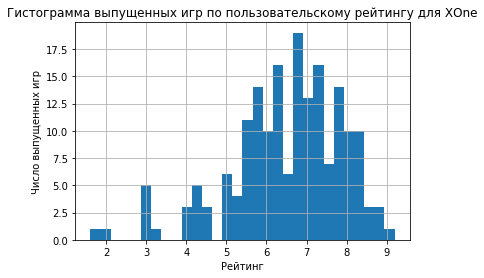

In [120]:
df_filtered_user_score = df_filtered[(df_filtered['user_score'] != 'tbd') & (df_filtered['user_score'] != 'tbd2')]
df_filtered_user_score['user_score'] = df_filtered_user_score['user_score'].astype(float)

df_xone = df_filtered_user_score[df_filtered_user_score['platform'] == 'XOne']['user_score']
df_pc = df_filtered_user_score[df_filtered_user_score['platform'] == 'PC']['user_score']

df_xone.hist(bins=30).set_title('Гистограмма выпущенных игр по пользовательскому рейтингу для XOne')
plt.xlabel('Рейтинг')
plt.ylabel('Число выпущенных игр')
plt.show()

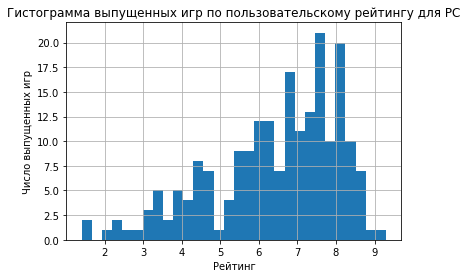

In [121]:
df_pc.hist(bins=30).set_title('Гистограмма выпущенных игр по пользовательскому рейтингу для PC')
plt.xlabel('Рейтинг')
plt.ylabel('Число выпущенных игр')
plt.show()

Гистограммы имеют довольно тяжёлый хвост слева, искажающий нормальное распределение. 
Проведём предварительный статистический тест на равенство дисперсий тестом Левене. Напишем функцию, которая считает дисперсии каждой из выборок, проводит тест Левене, считает equal_var для ttest и проводит его.

In [122]:
def check_variance_and_test_hypothesis(df_1, df_2):
    #Считает дисперсии каждой из выборок, проводит тест Левене, считает equal_var для ttest и проводит его.

    print('Дисперсия рейтинга первой выборки:', np.var(df_1, ddof=1).round())
    print()
    print('Дисперсия рейтинга второй выборки:', np.var(df_2, ddof=1).round())
    print()
    print('Дисперсия рейтинга по всем платформам', np.var(df_filtered_user_score['user_score']).round())

    stat, p = levene(df_1, df_2)
    print()
    print('Проверка тестом Левене:')
    print()
    print('p-Левене =', p)
    print()
    if p > 0.05:
        print('Дисперсии однородны')
        equal_var_for_ttest = True
    else:
        print('Дисперсии неоднородны')
        equal_var_for_ttest = False
        
    alpha = 0.05  # критический уровень статистической значимости
    # если p-value окажется меньше него - отвергнем гипотезу

    results = st.ttest_ind(df_1, df_2, equal_var = equal_var_for_ttest)
    
    print()
    print('p-значение:', results.pvalue)

    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу')
        
check_variance_and_test_hypothesis(df_xone, df_pc)

Дисперсия рейтинга первой выборки: 2.0

Дисперсия рейтинга второй выборки: 3.0

Дисперсия рейтинга по всем платформам 2.0

Проверка тестом Левене:

p-Левене = 0.01251484281850554

Дисперсии неоднородны

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Для выбранного уровня значимости не получилось отвергнуть нулевую гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Проверим вторую гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные. За нулевую гипотезу примем, что средние пользовательские рейтинги жанров Action и Sports одинаковые. Альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports разные. Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод t-test.

Построим гистограммы для каждого жанра по рейтингу.

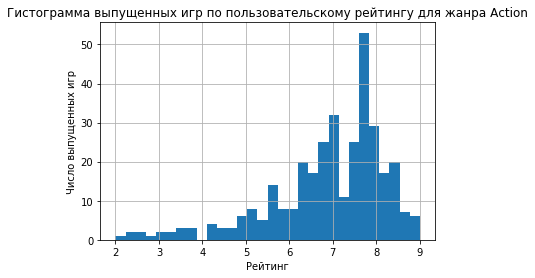

In [124]:
df_action = df_filtered_user_score[df_filtered_user_score['genre'] == 'Action']['user_score']
df_sports = df_filtered_user_score[df_filtered_user_score['genre'] == 'Sports']['user_score']

df_action.hist(bins=30).set_title('Гистограмма выпущенных игр по пользовательскому рейтингу для жанра Action')
plt.xlabel('Рейтинг')
plt.ylabel('Число выпущенных игр')
plt.show()

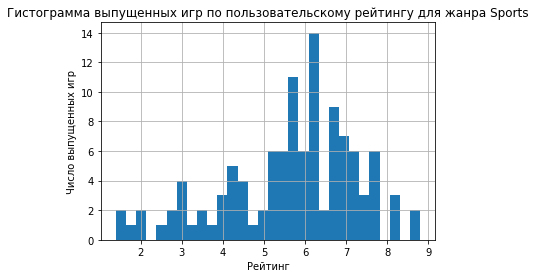

In [125]:
df_sports.hist(bins=30).set_title('Гистограмма выпущенных игр по пользовательскому рейтингу для жанра Sports')
plt.xlabel('Рейтинг')
plt.ylabel('Число выпущенных игр')
plt.show()

Проведём предварительный статистический тест на равенство дисперсий тестом Левене и проверим гипотезы ttest'ом

In [126]:
check_variance_and_test_hypothesis(df_action, df_sports)

Дисперсия рейтинга первой выборки: 2.0

Дисперсия рейтинга второй выборки: 3.0

Дисперсия рейтинга по всем платформам 2.0

Проверка тестом Левене:

p-Левене = 0.015678752727791484

Дисперсии неоднородны

p-значение: 1.9702408075214035e-11
Отвергаем нулевую гипотезу


Для выбранного уровня значимости отвергаем нулевую гипотезу, что средние пользовательские рейтинги жанров Action и Sports одинаковые.

### Вывод

Не получилось отвергнуть гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, и для гипотезы, что средние пользовательские рейтинги жанров Action и Sports разные, нет оснований предполагать обратное.

## Общий вывод

На подготовке данных обнаружены пропуски в Year_of_Release, Critic_Score, User_Score и Rating, которые могут быть связаны с техническими проблемами, и о которых стоит сообщить в разработку. Возможно, данные по рейтингу были собраны из разных источников и склеены в итоге.

Обнаружено 'tbd' в рейтингах. Выяснили, что это означает To Be Determined (будет определено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить. Привели все пропуски в рейтинге к 'tbd2'.

Для анализа взяли те платформы, что актуальны сейчас (в 2016 году). Это PS4, XOne, 3DS, PC, PSV и WiiU. У PC не так хорошо с продажами, как у топов, но зато они стабильно есть.

Посмотрели, как рейтинги пользователей и критиков влияют на продажи по всем отобранным платформам и в пределах одной популярной платформы PS4. Пользователи самой популярной платформы PS4 больше внимания обращают на рейтинг критиков, чем в целом по всем остальным платформам. Рейтинг пользователей не играет значительной роли при оценке продаж как для PS4, так и для всех отобранных платформ.

Было больше прибыли с игр жанра Action, следом идут Shooter и Sports. Наименее популярны Puzzle, Strategy и Adventure. Можно сказать, что **жанры категории "на реакцию" значительно более популярны "игр на подумать"**. Однако, **среди пользователей PC Role-Playing и Strategy выходят в топ 5**. И в целом можно выделить, какой жанр на какой платформе лучше продается. Однако, в среднем игра жанра Action не так много приносит денег, и на первый план выходят Shooter и становятся заметны игры жанра Platform. 

**В Северной Америке и Европе популярнее платформы  PS4 и XOne, в Японии 3DS**. Стоит отметить, что **60% игр с PC приходится на Европу, а в Японии X box очень сильно отстает от остальных платформ**. По жанрам Америка и Европа схожи с распределением по всем регионам, а **Япония в первую очередь любит Role-Playing и совсем не в их вкусе Shooter, зато появляются игры жанра Simulation**.

В Северной Америке и Европе наиболее популярны игры для взрослых, на втором месте с небольшим отрывом игры для всех. Для Японии на первом месте игры для всех, на втором для тинейджеров, на третьем - для взрослых, и на последнем - для детей младшего возраста. Взрослые в Японии менее активно играют в игры, либо выбирают игры других категорий.

Не получилось отвергнуть гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, и для гипотезы, что средние пользовательские рейтинги жанров Action и Sports разные, нет оснований предполагать обратное.

Таким образом, **успешность игры зависит от соответствия жанра региону**. То есть, реклама жанра Simulation пройдёт успешнее в Японии, а Action, Shooter и Sports в Северной Америке и Европе. **Рекламу игр разных жанров имеет смысл настраивать в зависимости от платформы**:

- Action и Sports - для пользователей X box, Play Station и WiiU, 
- Shooter - для пользователей X box и Play Station,
- Role-Playing - для пользователей 3DS и PC
- Strategy - для пользователей PC
- Misc и Puzzle - для пользователей WiiU, так как продаж на остальных платформах почти нет

Наиболее популярные платформы, жанры и рейтинги:


***Северная Америка***

Платформы:  ХOne, PS4, WiiU

Жанры: Shooter, Platform, Sports 

Рейтинги: M, E

***ЕС***

Платформы: PS4, ХOne, WiiU, но здесь значительно много людей играют на PC

Жанры: Shooter, Sports, Platform

Рейтинги: M, E

***Япония***

Платформы: 3DS, WiiU и PSV. И ***совсем не популярна XOne***

Жанры: RPG, Simulation, Platform

Рейтинги: E, T и очень много игр с неопределенным рейтингом.